In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Cinderella_II_Dataset.csv') ## if the data in CSV file

df.shape

(243688, 48)

In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243688 entries, 0 to 243687
Data columns (total 48 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   engine_fuel_rate        243688 non-null  float64
 1   accum_fuel_leg          243688 non-null  float64
 2   engine_rpm              243688 non-null  float64
 3   accelPedalPos           243688 non-null  float64
 4   latitude                243688 non-null  float64
 5   longitude               243688 non-null  float64
 6   speedOverGround         243688 non-null  float64
 7   courseOverGroundTrue    243688 non-null  float64
 8   speedApparent           243688 non-null  float64
 9   heading_magnetic        243688 non-null  float64
 10  pitch                   243688 non-null  float64
 11  roll                    243688 non-null  float64
 12  rateOfTurn              243688 non-null  float64
 13  course_heading_diff     243688 non-null  float64
 14  magnetic_variation  

In [4]:
display(df)

,engine_fuel_rate,accum_fuel_leg,engine_rpm,accelPedalPos,latitude,longitude,speedOverGround,courseOverGroundTrue,speedApparent,heading_magnetic,...,distanceToPreviousDock,delta_distance,accumDistLeg,Timestamp,accum_time_leg,sailing_state,closest_dock,segment_state,leg,RT_id
0,82.000000,0.013583,1326.416667,0.106413,59.401617,18.355397,0.448467,171.795700,4.662587,167.395300,...,17.744368,0.192010,0.375416,2022-07-01 08:54:52,0.60,un_specified,vaxholm,docking,vaxholm-sodra,0.0
1,101.333333,0.036750,1340.500000,0.131053,59.401609,18.355403,0.589003,171.795700,4.363132,167.395300,...,18.369153,0.228877,1.025822,2022-07-01 08:54:53,1.50,un_specified,vaxholm,docking,vaxholm-sodra,0.0
2,114.500000,0.069500,1379.500000,0.146299,59.401597,18.355410,0.742814,171.795700,4.006906,167.395300,...,19.411825,0.274332,1.930372,2022-07-01 08:54:54,2.55,un_specified,vaxholm,docking,vaxholm-sodra,0.0
3,120.000000,0.103833,1423.166667,0.152447,59.401582,18.355416,0.900456,171.795700,4.046811,167.395300,...,20.731121,0.331778,3.011387,2022-07-01 08:54:55,3.60,un_specified,vaxholm,docking,vaxholm-sodra,0.0
4,122.000000,0.134333,1423.083333,0.158249,59.401569,18.355422,1.056645,171.795700,4.165147,167.395300,...,21.983082,0.388637,4.119830,2022-07-01 08:54:56,4.50,un_specified,vaxholm,docking,vaxholm-sodra,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243683,28.375000,72.488531,1079.875000,-0.000833,59.401974,18.355802,0.087500,127.806862,7.480028,252.354950,...,11179.399849,0.023743,13140.684068,2022-11-06 15:22:27,1991.25,un_specified,vaxholm,docking,sodra-vaxholm,123.0
243684,35.666667,72.498028,1081.500000,0.026666,59.401974,18.355803,0.208333,173.826817,8.205154,253.009533,...,11179.395662,0.017866,13140.753436,2022-11-06 15:22:28,1992.30,un_specified,vaxholm,docking,sodra-vaxholm,123.0
243685,39.333333,72.507694,1081.416667,0.038610,59.401973,18.355803,0.208333,169.127583,8.477634,253.374350,...,11179.390546,0.015530,13140.801752,2022-11-06 15:22:29,1993.20,un_specified,vaxholm,docking,sodra-vaxholm,123.0
243686,42.000000,72.519667,1080.562500,0.024791,59.401972,18.355803,0.162500,171.542863,8.435836,254.368200,...,11179.378464,0.016695,13140.857808,2022-11-06 15:22:30,1994.25,un_specified,vaxholm,docking,sodra-vaxholm,123.0


In [5]:
#Vessel Movement Kinematics Analysis: Study the impact of vessel movement kinematics 
#(pitch, roll, rate of turn) on fuel consumption.

data = df[['pitch', 'roll', 'rateOfTurn', 'engine_fuel_rate', 'accum_fuel_leg', 'longitude', 'latitude', 'Timestamp', 'RT_id', 
            'windDirection_Onb',
            'windSpeed_Onb',
            'windSpeed_cpr',
            'windDirection_cpr',
            'windSpeed_sg',
            'windDirection_sg',
            'waveHeight',
            'waveDirection',
            'currentSpeed',
            'currentDirection',
            'Temp_2m',
            'Press_surf',
            'Precip',
            'swellHeight',
            'secondarySwellHeight',
            'WaveSwell_ht',
            'Swell_ht',
            'courseOverGroundTrue']]
display(data)
print(data.longitude.min(), data.longitude.max())
print(data.latitude.min(), data.latitude.max())
print('______________________')
#print(data['Snow_depth'].value_counts())

,pitch,roll,rateOfTurn,engine_fuel_rate,accum_fuel_leg,longitude,latitude,Timestamp,RT_id,windDirection_Onb,...,currentSpeed,currentDirection,Temp_2m,Press_surf,Precip,swellHeight,secondarySwellHeight,WaveSwell_ht,Swell_ht,courseOverGroundTrue
0,-2.996567,1.663467,-3.453817,82.000000,0.013583,18.355397,59.401617,2022-07-01 08:54:52,0.0,160.576217,...,0.049144,180.0,21.809631,101286.910,0.002678,0.535722,0.100856,1.387444,0.619551,171.795700
1,-3.030933,1.361700,-3.348667,101.333333,0.036750,18.355403,59.401609,2022-07-01 08:54:53,0.0,156.996200,...,0.049147,180.0,21.809631,101286.914,0.002678,0.535736,0.100853,1.387459,0.619582,171.795700
2,-2.397850,1.773275,-2.907175,114.500000,0.069500,18.355410,59.401597,2022-07-01 08:54:54,0.0,153.420925,...,0.049150,180.0,21.809631,101286.914,0.002678,0.535750,0.100850,1.387474,0.619613,171.795700
3,-2.297600,0.998867,-2.367100,120.000000,0.103833,18.355416,59.401582,2022-07-01 08:54:55,0.0,149.662333,...,0.049153,180.0,21.809631,101286.920,0.002677,0.535764,0.100847,1.387488,0.619644,171.795700
4,-2.664267,0.664633,-2.143433,122.000000,0.134333,18.355422,59.401569,2022-07-01 08:54:56,0.0,151.495800,...,0.049156,180.0,21.809631,101286.920,0.002677,0.535778,0.100844,1.387503,0.619675,171.795700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243683,3.733550,-0.201250,4.229213,28.375000,72.488531,18.355802,59.401974,2022-11-06 15:22:27,123.0,210.930100,...,0.020000,180.0,10.156494,100333.260,0.000399,0.743742,0.103675,2.048510,0.515422,127.806862
243684,3.598200,0.614967,5.245033,35.666667,72.498028,18.355803,59.401974,2022-11-06 15:22:28,123.0,206.375550,...,0.020000,180.0,10.156555,100333.260,0.000399,0.743744,0.103700,2.048510,0.515455,173.826817
243685,3.598200,0.194800,6.428600,39.333333,72.507694,18.355803,59.401973,2022-11-06 15:22:29,123.0,207.490900,...,0.020000,180.0,10.156586,100333.260,0.000399,0.743747,0.103725,2.048509,0.515487,169.127583
243686,3.734275,-0.598712,7.797450,42.000000,72.519667,18.355803,59.401972,2022-11-06 15:22:30,123.0,207.843275,...,0.020000,180.0,10.156647,100333.266,0.000399,0.743750,0.103750,2.048509,0.515520,171.542863


18.34941936820988 18.55731951193416
59.40100057453704 59.44398860097736
______________________


C:\Users\ernil\AppData\Local\Temp\ipykernel_24564\445310060.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Relative_wind_direction'] = data[['courseOverGroundTrue', 'windDirection_Onb']].apply(relative_angle, axis=1)


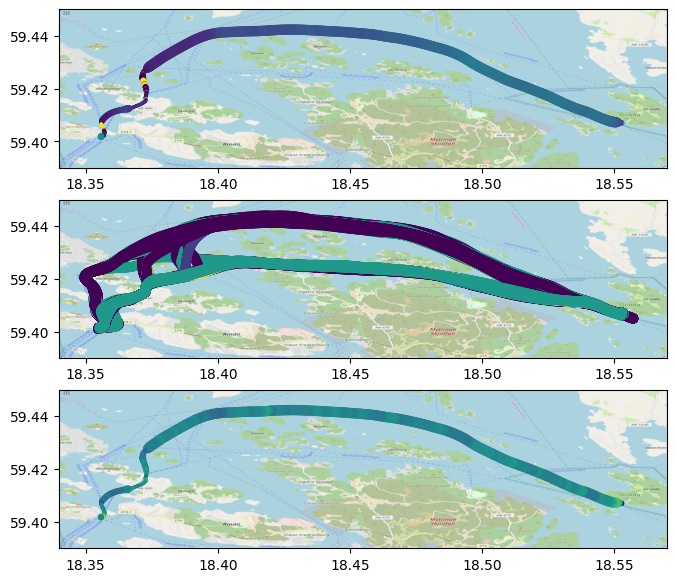

In [61]:
im = plt.imread("map_waxholm.png")
def relative_angle(series_in):
    heading = series_in[0]
    angle = series_in[1]
    angle_diff = (angle - heading)%360
    if angle_diff > 180:
        angle_diff -= 360
    return angle_diff

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(20,7))

def get_rt(rt):
    rt_data = data[data['RT_id']==rt]
    return rt_data

def plot_map():
    plt.figure(figsize=(20,5))
    im = plt.imread("map_waxholm.png")
    return plt.imshow(im, extent=[18.34, 18.57, 59.39, 59.45])

data['Relative_wind_direction'] = data[['courseOverGroundTrue', 'windDirection_Onb']].apply(relative_angle, axis=1)
rt_data = get_rt(1)
fuel = rt_data.engine_fuel_rate
ax1.scatter(rt_data.longitude, rt_data.latitude, c=rt_data.Relative_wind_direction, s=fuel*.1, alpha=.5)
ax1.imshow(im, extent=[18.34, 18.57, 59.39, 59.45])
ax2.scatter(data.longitude, data.latitude, c=data.currentDirection, alpha=.5)
ax2.imshow(im, extent=[18.34, 18.57, 59.39, 59.45])
ax3.scatter(rt_data.longitude, rt_data.latitude, c=rt_data.rateOfTurn, s=fuel*.1, alpha=.5)
ax3.imshow(im, extent=[18.34, 18.57, 59.39, 59.45])

In [7]:

route_data = pd.MultiIndex.from_frame(data)
display(data)

,pitch,roll,rateOfTurn,engine_fuel_rate,accum_fuel_leg,longitude,latitude,Timestamp,RT_id,windDirection_Onb,...,currentSpeed,currentDirection,Temp_2m,Press_surf,Precip,swellHeight,secondarySwellHeight,WaveSwell_ht,Swell_ht,courseOverGroundTrue
0,-2.996567,1.663467,-3.453817,82.000000,0.013583,18.355397,59.401617,2022-07-01 08:54:52,0.0,160.576217,...,0.049144,180.0,21.809631,101286.910,0.002678,0.535722,0.100856,1.387444,0.619551,171.795700
1,-3.030933,1.361700,-3.348667,101.333333,0.036750,18.355403,59.401609,2022-07-01 08:54:53,0.0,156.996200,...,0.049147,180.0,21.809631,101286.914,0.002678,0.535736,0.100853,1.387459,0.619582,171.795700
2,-2.397850,1.773275,-2.907175,114.500000,0.069500,18.355410,59.401597,2022-07-01 08:54:54,0.0,153.420925,...,0.049150,180.0,21.809631,101286.914,0.002678,0.535750,0.100850,1.387474,0.619613,171.795700
3,-2.297600,0.998867,-2.367100,120.000000,0.103833,18.355416,59.401582,2022-07-01 08:54:55,0.0,149.662333,...,0.049153,180.0,21.809631,101286.920,0.002677,0.535764,0.100847,1.387488,0.619644,171.795700
4,-2.664267,0.664633,-2.143433,122.000000,0.134333,18.355422,59.401569,2022-07-01 08:54:56,0.0,151.495800,...,0.049156,180.0,21.809631,101286.920,0.002677,0.535778,0.100844,1.387503,0.619675,171.795700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243683,3.733550,-0.201250,4.229213,28.375000,72.488531,18.355802,59.401974,2022-11-06 15:22:27,123.0,210.930100,...,0.020000,180.0,10.156494,100333.260,0.000399,0.743742,0.103675,2.048510,0.515422,127.806862
243684,3.598200,0.614967,5.245033,35.666667,72.498028,18.355803,59.401974,2022-11-06 15:22:28,123.0,206.375550,...,0.020000,180.0,10.156555,100333.260,0.000399,0.743744,0.103700,2.048510,0.515455,173.826817
243685,3.598200,0.194800,6.428600,39.333333,72.507694,18.355803,59.401973,2022-11-06 15:22:29,123.0,207.490900,...,0.020000,180.0,10.156586,100333.260,0.000399,0.743747,0.103725,2.048509,0.515487,169.127583
243686,3.734275,-0.598712,7.797450,42.000000,72.519667,18.355803,59.401972,2022-11-06 15:22:30,123.0,207.843275,...,0.020000,180.0,10.156647,100333.266,0.000399,0.743750,0.103750,2.048509,0.515520,171.542863


Figure(640x480)


Text(0.5, 1.0, 'Roll vs Fuel')

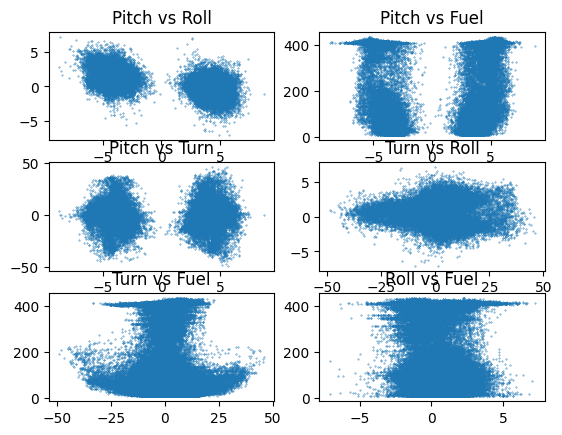

In [8]:
correlation = data.corr()
#print(correlation)
fig, ax = plt.subplots(3,2)
print(fig)
#plt.imshow(correlation)
ax[0,0].scatter(data['pitch'], data['roll'], s=.1)
ax[0,0].set_title('Pitch vs Roll')
ax[0,1].scatter(data['pitch'], data['engine_fuel_rate'], s=.1)
ax[0,1].set_title('Pitch vs Fuel')
ax[1,0].scatter(data['pitch'], data['rateOfTurn'], s=.1)
ax[1,0].set_title('Pitch vs Turn')
ax[1,1].scatter(data['rateOfTurn'], data['roll'], s=.1)
ax[1,1].set_title('Turn vs Roll')
ax[2,0].scatter(data['rateOfTurn'], data['engine_fuel_rate'], s=.1)
ax[2,0].set_title('Turn vs Fuel')
ax[2,1].scatter(data['roll'], data['engine_fuel_rate'], s=.1)
ax[2,1].set_title('Roll vs Fuel')

In [9]:

rt_data['Timestamp'] = pd.to_datetime(rt_data['Timestamp'])
rt_data.set_index('Timestamp', drop=True, inplace=True)
rt_norm=(rt_data-rt_data.min())/(rt_data.max()-rt_data.min())


C:\Users\ernil\AppData\Local\Temp\ipykernel_24564\3326393960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_data['Timestamp'] = pd.to_datetime(rt_data['Timestamp'])


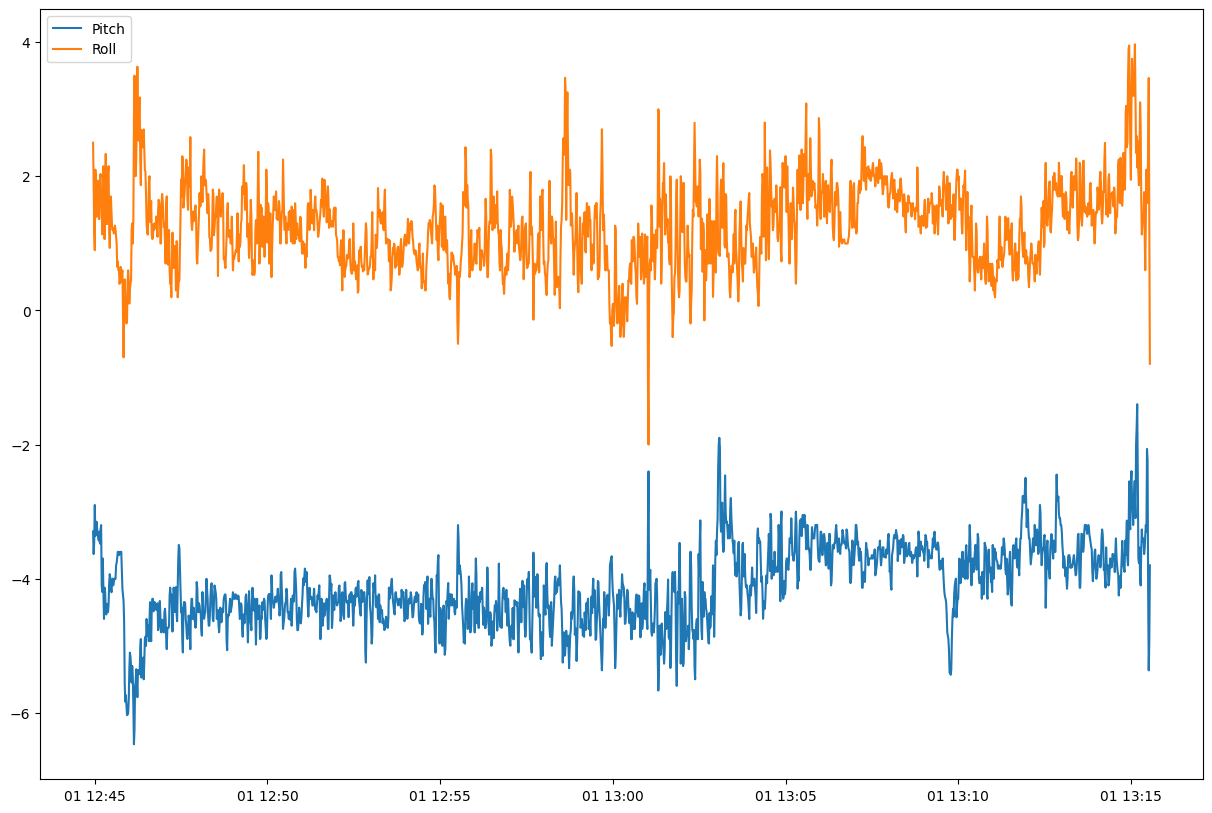

In [10]:
plt.figure(figsize=(15,10))
#plt.plot(rt_norm.index, rt_norm['engine_fuel_rate'], label='Fuel')
plt.plot(rt_norm.index, rt_data['pitch'], label='Pitch')
#plt.plot(rt_norm.index, rt_norm['rateOfTurn'], label='Turn')'
plt.plot(rt_norm.index, rt_data['roll'], label='Roll')
plt.legend()

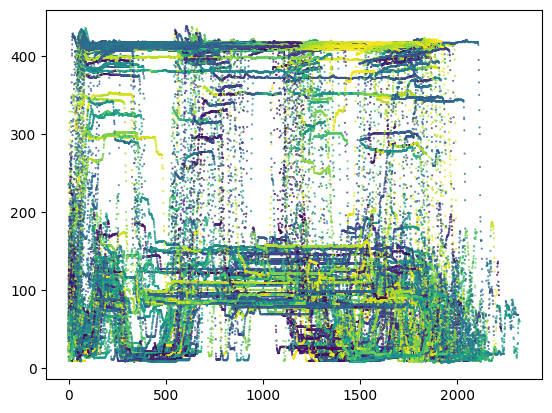

In [11]:
import scipy.stats as stat
fuel_trip = []
plt.figure()
for i in range(124):
    trip = data[data['RT_id'] == i]
    #fuel_trip.append(trip['engine_fuel_rate'].sum())
    plt.scatter(x=range(len(trip)), y=trip['engine_fuel_rate'], c=trip['windDirection_Onb'], s=.2)


<AxesSubplot:>

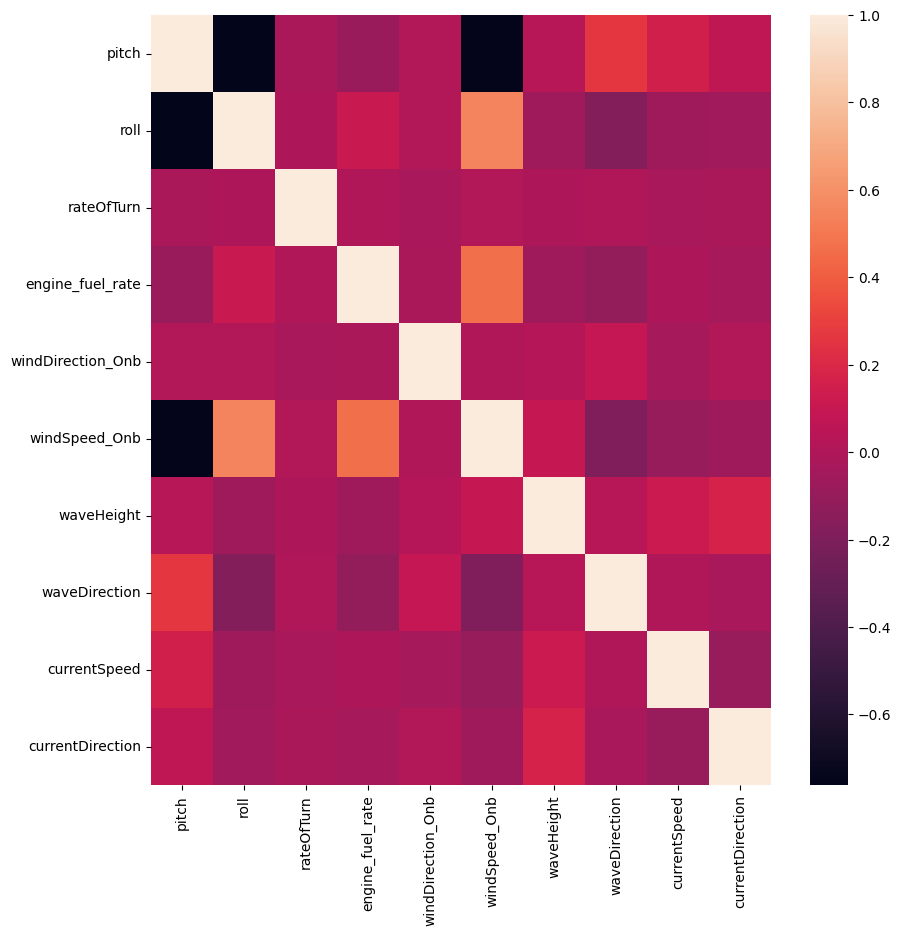

In [17]:
import seaborn as sns
corrdata = data[['pitch', 'roll', 'rateOfTurn', 'engine_fuel_rate', 'windDirection_Onb', 'windSpeed_Onb',
                 'waveHeight', 'waveDirection', 'currentSpeed', 
                 'currentDirection']]
correlate = corrdata.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(correlate)

179.99988888888885


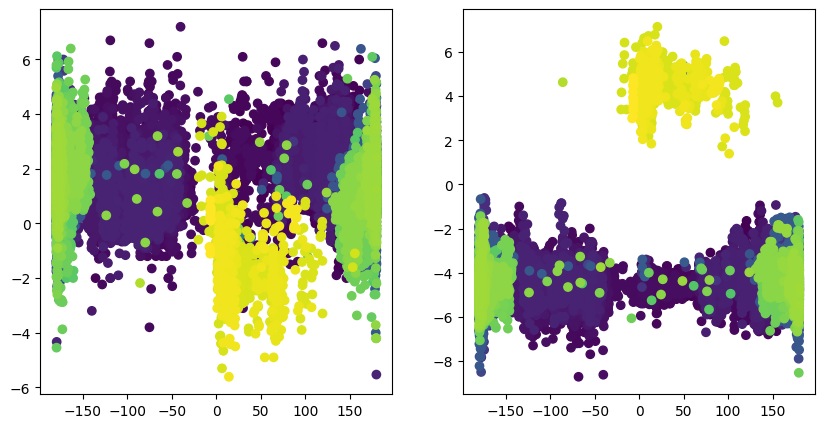

In [13]:

rt_data = get_rt(100)
roll_pitch_data = data.query('windSpeed_Onb > 16.56')[['windDirection_Onb', 'roll', 'pitch','courseOverGroundTrue']]
dir_wind = roll_pitch_data[['courseOverGroundTrue', 'windDirection_Onb']].apply(relative_angle, axis=1)
print(max(dir_wind))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.scatter(dir_wind, roll_pitch_data['roll'], c=roll_pitch_data.index)
ax2.scatter(dir_wind, roll_pitch_data['pitch'], c=roll_pitch_data.index)


Text(0.5, 1.0, 'Engine Fuel Rate - Wind Speed Onboard')

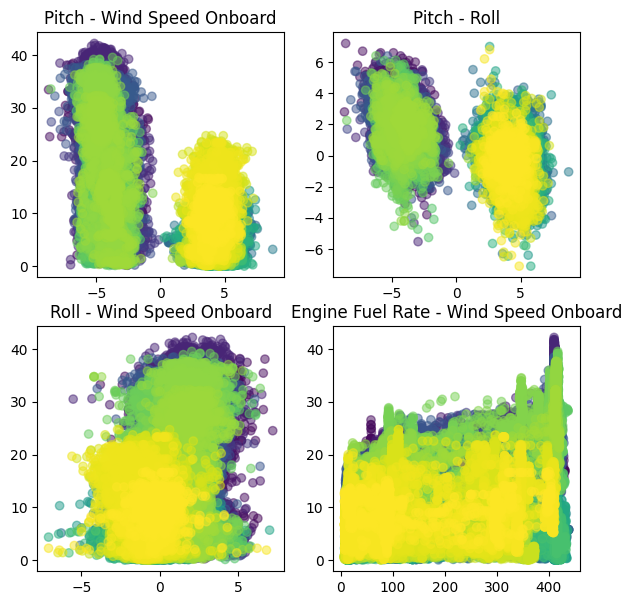

In [31]:
ny_data = data[['pitch', 'roll', 'windSpeed_Onb', 'engine_fuel_rate']]
fig, ax = plt.subplots(2,2, figsize=(7,7))
ax[0,0].scatter(ny_data['pitch'], ny_data['windSpeed_Onb'], c=ny_data.index, alpha=.5)
ax[0,0].set_title('Pitch - Wind Speed Onboard')
ax[0,1].scatter(ny_data['pitch'], ny_data['roll'], c=ny_data.index, alpha=.5)
ax[0,1].set_title('Pitch - Roll')
ax[1,0].scatter(ny_data['roll'], ny_data['windSpeed_Onb'], c=ny_data.index, alpha=.5)
ax[1,0].set_title('Roll - Wind Speed Onboard')
ax[1,1].scatter(ny_data['engine_fuel_rate'], ny_data['windSpeed_Onb'], c=data.RT_id, alpha=.5)
ax[1,1].set_title('Engine Fuel Rate - Wind Speed Onboard')

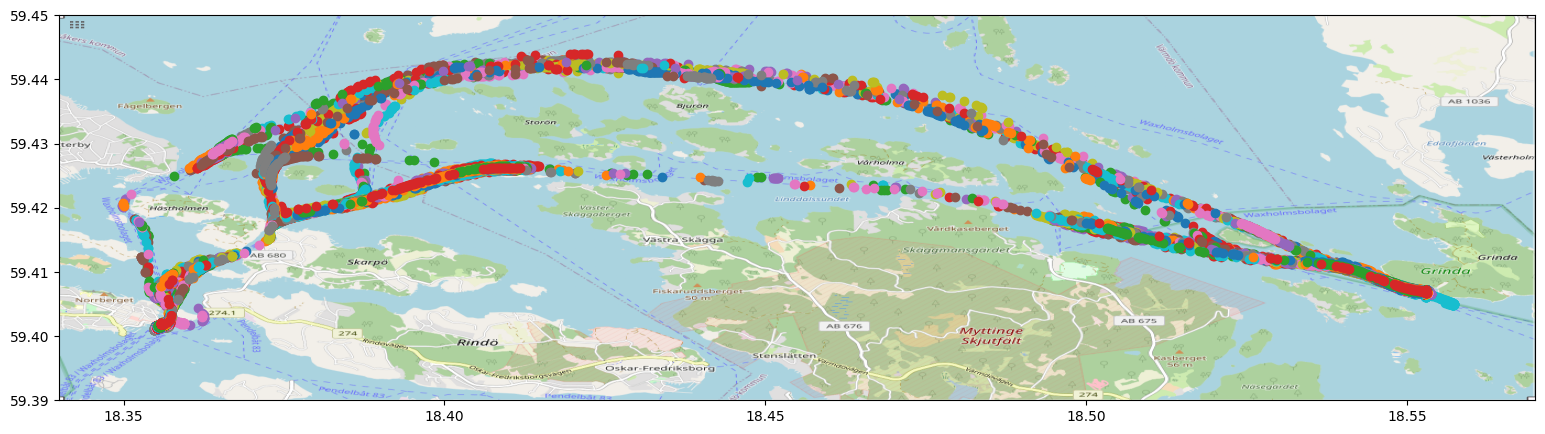

In [59]:
from pyod.models.iforest import IForest
anomalies = []
plot_map()
for i in range(124):
    rt_data = get_rt(i)
    rt_data = rt_data[['pitch', 'roll', 'windSpeed_Onb', 'engine_fuel_rate', 'latitude', 'longitude']]
    model = IForest(max_features=4).fit(rt_data)
    #print(np.count_nonzero(model.labels_))
    anomalies.append(np.ravel(np.argwhere(model.labels_ == True)))
    lon_data = rt_data['longitude'].iloc[anomalies[i]]
    lat_data = rt_data['latitude'].iloc[anomalies[i]]
    plt.scatter(lon_data, lat_data)
#print(anomalies)
    

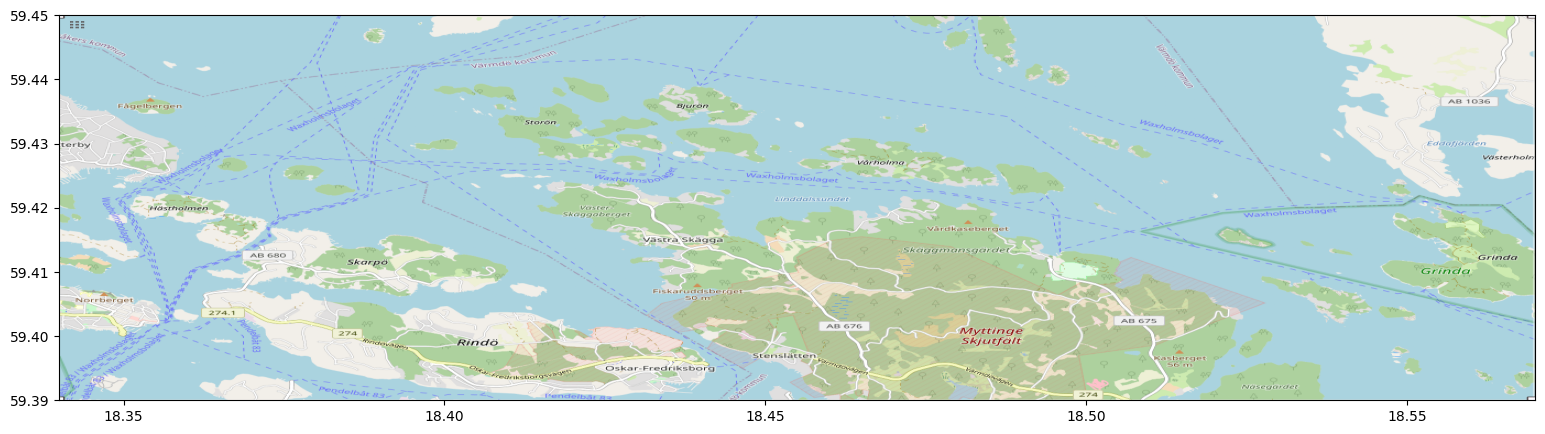

In [70]:
data['current_value'] = data['currentDirection'].apply(lambda x:x>90)
high_current = data['engine_fuel_rate'].loc[data['current_value']]
low_current = data['engine_fuel_rate'].loc[data['current_value'].eq(False)]
print(high_current.mean(), low_current.mean())

208.2390542119044 219.09254718203303


C:\Users\ernil\AppData\Local\Temp\ipykernel_24564\306465895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['current_value'] = data['currentDirection'].apply(lambda x:x>90)
